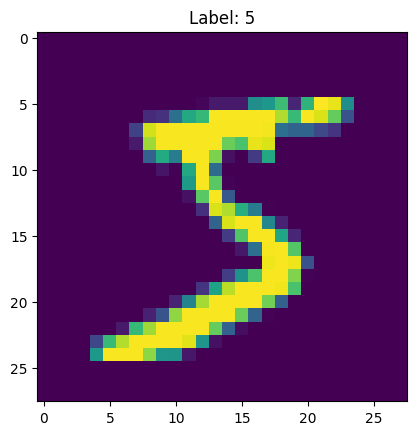

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298585
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.257543
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.407245
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.282178
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.177011
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.176683
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.125611
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.257741
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.163876
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.199151


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from typing import Tuple

# Neural Network with a single hidden layer
class SimpleNet(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, num_classes: int) -> None:
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train(model: nn.Module, device: torch.device, train_loader: DataLoader, optimizer: optim.Optimizer, epoch: int) -> None:
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.view(data.size(0), -1)  # Flatten the images
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

def main() -> None:
    # Hyperparameters
    input_size: int = 784  # 28x28 images
    hidden_size: int = 128
    num_classes: int = 10
    num_epochs: int = 1
    batch_size: int = 64
    learning_rate: float = 0.001

    # Device configuration
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # MNIST dataset
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
    
    import matplotlib.pyplot as plt
    plt.imshow(train_dataset[0][0][0])
    plt.title(f'Label: {train_dataset[0][1]}')
    plt.show()
    
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    model = SimpleNet(input_size, hidden_size, num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(1, num_epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        

	return model
    

MODEL = main()
